In [1]:
#Import the required libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [2]:
train_data = pd.read_csv('../notebook/cleaned_data_for_regression.csv')
test_data = pd.read_csv('../notebook/cleaned_test_data.csv')

In [3]:
train_data.head()

,Unnamed: 0,amount_donated,control_number,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,0.0,5,101,87.0,0,X,5,54,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,2,0.0,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,3,0.0,38,92,60.0,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,4,0.0,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [4]:
test_data

,Unnamed: 0,control_number,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,donor_gender,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,139,101,59.0,0,R,2,46,U,F,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,1,142,137,59.0,0,R,2,43,U,F,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,2,282,17,30.0,0,T,1,35,H,M,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,3,368,137,75.0,0,U,1,2,H,M,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,4,387,5,59.0,0,T,2,40,U,F,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,2143,190842,101,47.0,1,C,1,24,U,F,...,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,2144,191056,41,17.0,1,U,1,1,U,M,...,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,2145,191164,89,55.0,0,X,5,54,U,F,...,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,2146,191484,65,42.0,1,X,5,54,U,F,...,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1


In [5]:
def drop_column(column_name, data):
    dropped_data = data.drop([column_name], axis = 1) 
    return dropped_data

In [6]:
train_control_no = train_data.control_number
train_data = drop_column('control_number',train_data)
test_control_no = test_data.control_number
test_data = drop_column('control_number',test_data)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   19372 non-null  int64  
 1   amount_donated               19372 non-null  float64
 2   months_since_origin          19372 non-null  int64  
 3   donor_age                    19372 non-null  float64
 4   in_house                     19372 non-null  int64  
 5   urbanicity                   19372 non-null  object 
 6   ses                          19372 non-null  int64  
 7   cluster_code                 19372 non-null  int64  
 8   home_owner                   19372 non-null  object 
 9   donor_gender                 19372 non-null  object 
 10  income_group                 19372 non-null  float64
 11  published_phone              19372 non-null  int64  
 12  overlay_source               19372 non-null  object 
 13  mor_hit_rate    

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2148 non-null   int64  
 1   months_since_origin          2148 non-null   int64  
 2   donor_age                    2148 non-null   float64
 3   in_house                     2148 non-null   int64  
 4   urbanicity                   2148 non-null   object 
 5   ses                          2148 non-null   int64  
 6   cluster_code                 2148 non-null   int64  
 7   home_owner                   2148 non-null   object 
 8   donor_gender                 2148 non-null   object 
 9   income_group                 2148 non-null   float64
 10  published_phone              2148 non-null   int64  
 11  overlay_source               2148 non-null   object 
 12  mor_hit_rate                 2148 non-null   int64  
 13  wealth_rating     

In [9]:
train_data.drop("Unnamed: 0", axis=1, inplace=True)
test_data.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
train_data.shape, test_data.shape

((19372, 48), (2148, 47))

In [11]:
train_data = train_data[train_data.amount_donated != 0.00]

In [12]:
# Selecting the independent variables and the target variable
#
y = train_data['amount_donated']
X = train_data.drop('amount_donated', axis = 1)


* **Joining the Train and Test data to encode the categorical columns together**

In [13]:
total_data = pd.concat([X, test_data])

In [14]:
df_numerical = total_data.select_dtypes(include = [np.number])

In [15]:
df_categorical = total_data.select_dtypes(include = [object])

In [16]:
df_categorical = df_categorical.apply(lambda x: x.astype('category'))

In [17]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 1 to 2147
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   urbanicity           6991 non-null   category
 1   home_owner           6991 non-null   category
 2   donor_gender         6991 non-null   category
 3   overlay_source       6991 non-null   category
 4   recency_status_96nk  6991 non-null   category
dtypes: category(5)
memory usage: 89.5 KB


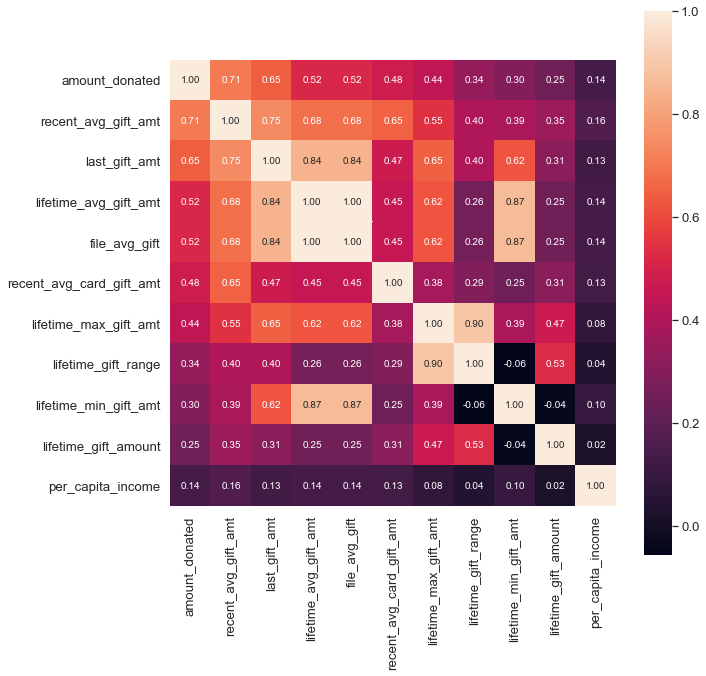

In [18]:
corrmatrix = train_data.corr()
k = 11 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'amount_donated')['amount_donated'].index
cm = np.corrcoef(train_data[cols].values.T)
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.20)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

In [19]:
train_data.shape

(4843, 48)

In [20]:
train_data.columns.to_list()

['amount_donated',
 'months_since_origin',
 'donor_age',
 'in_house',
 'urbanicity',
 'ses',
 'cluster_code',
 'home_owner',
 'donor_gender',
 'income_group',
 'published_phone',
 'overlay_source',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'recency_status_96nk',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_g

In [21]:
df_categorical.shape

(6991, 5)

In [22]:
df_categorical.head()

,urbanicity,home_owner,donor_gender,overlay_source,recency_status_96nk
1,R,H,M,P,S
7,C,H,F,P,A
9,R,H,F,B,S
14,R,U,F,M,S
16,R,U,M,B,A


In [23]:

total_data=pd.get_dummies(total_data,drop_first=True)

In [24]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
7,89,79.0,0,2,28,1.0,0,0,5.0,1004,...,0,0,0,0,1,0,0,0,0,0
9,101,63.0,0,2,43,4.0,1,0,5.0,399,...,0,0,0,0,0,0,0,0,0,1
14,137,60.0,0,2,43,5.0,1,0,1.0,475,...,1,0,0,1,0,0,0,0,0,1
16,77,81.0,0,2,45,4.0,1,24,3.0,530,...,1,1,0,0,0,0,0,0,0,0


In [25]:
total_data.shape

(6991, 57)

In [26]:
total_data.columns.to_list()

['months_since_origin',
 'donor_age',
 'in_house',
 'ses',
 'cluster_code',
 'income_group',
 'published_phone',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_gift',
 'file_card_gift',
 'urbanicity_R',
 'urbanicity_S',
 'urbanicity_T',
 'urbanicity_U',
 'urbanicity_X',

* **Scaling makes the linear regression model perform badly**

In [27]:
# total_data[['months_since_origin',
#  'donor_age',
#  'in_house',
#  'ses',
#  'cluster_code',
#  'income_group',
#  'published_phone',
#  'mor_hit_rate',
#  'wealth_rating',
#  'median_home_value',
#  'median_household_income',
#  'pct_owner_occupied',
#  'per_capita_income',
#  'pct_attribute1',
#  'pct_attribute2',
#  'pct_attribute3',
#  'pct_attribute4',
#  'pep_star',
#  'recent_star_status',
#  'frequency_status_97nk',
#  'recent_response_prop',
#  'recent_avg_gift_amt',
#  'recent_card_response_prop',
#  'recent_avg_card_gift_amt',
#  'recent_response_count',
#  'recent_card_response_count',
#  'months_since_last_prom_resp',
#  'lifetime_card_prom',
#  'lifetime_prom',
#  'lifetime_gift_amount',
#  'lifetime_gift_count',
#  'lifetime_avg_gift_amt',
#  'lifetime_gift_range',
#  'lifetime_max_gift_amt',
#  'lifetime_min_gift_amt',
#  'last_gift_amt',
#  'card_prom_12',
#  'number_prom_12',
#  'months_since_last_gift',
#  'months_since_first_gift',
#  'file_avg_gift',
#  'file_card_gift',
#  'urbanicity_R',
#  'urbanicity_S',
#  'urbanicity_T',
#  'urbanicity_U',
#  'urbanicity_X',
#  'home_owner_U',
#  'donor_gender_M',
#  'donor_gender_U',
#  'overlay_source_M',
#  'overlay_source_P',
#  'recency_status_96nk_E',
#  'recency_status_96nk_F',
#  'recency_status_96nk_L',
#  'recency_status_96nk_N',
#  'recency_status_96nk_S']] = StandardScaler().fit_transform(total_data[['months_since_origin',
#  'donor_age',
#  'in_house',
#  'ses',
#  'cluster_code',
#  'income_group',
#  'published_phone',
#  'mor_hit_rate',
#  'wealth_rating',
#  'median_home_value',
#  'median_household_income',
#  'pct_owner_occupied',
#  'per_capita_income',
#  'pct_attribute1',
#  'pct_attribute2',
#  'pct_attribute3',
#  'pct_attribute4',
#  'pep_star',
#  'recent_star_status',
#  'frequency_status_97nk',
#  'recent_response_prop',
#  'recent_avg_gift_amt',
#  'recent_card_response_prop',
#  'recent_avg_card_gift_amt',
#  'recent_response_count',
#  'recent_card_response_count',
#  'months_since_last_prom_resp',
#  'lifetime_card_prom',
#  'lifetime_prom',
#  'lifetime_gift_amount',
#  'lifetime_gift_count',
#  'lifetime_avg_gift_amt',
#  'lifetime_gift_range',
#  'lifetime_max_gift_amt',
#  'lifetime_min_gift_amt',
#  'last_gift_amt',
#  'card_prom_12',
#  'number_prom_12',
#  'months_since_last_gift',
#  'months_since_first_gift',
#  'file_avg_gift',
#  'file_card_gift',
#  'urbanicity_R',
#  'urbanicity_S',
#  'urbanicity_T',
#  'urbanicity_U',
#  'urbanicity_X',
#  'home_owner_U',
#  'donor_gender_M',
#  'donor_gender_U',
#  'overlay_source_M',
#  'overlay_source_P',
#  'recency_status_96nk_E',
#  'recency_status_96nk_F',
#  'recency_status_96nk_L',
#  'recency_status_96nk_N',
#  'recency_status_96nk_S']])

In [28]:
total_data.shape

(6991, 57)

In [29]:
total_data.dtypes

months_since_origin              int64
donor_age                      float64
in_house                         int64
ses                              int64
cluster_code                     int64
income_group                   float64
published_phone                  int64
mor_hit_rate                     int64
wealth_rating                  float64
median_home_value                int64
median_household_income          int64
pct_owner_occupied               int64
per_capita_income                int64
pct_attribute1                   int64
pct_attribute2                   int64
pct_attribute3                   int64
pct_attribute4                   int64
pep_star                         int64
recent_star_status               int64
frequency_status_97nk            int64
recent_response_prop           float64
recent_avg_gift_amt            float64
recent_card_response_prop      float64
recent_avg_card_gift_amt       float64
recent_response_count            int64
recent_card_response_coun

In [30]:
independent_variables = ['months_since_origin',
 'donor_age',
 'in_house',
 'ses',
 'cluster_code',
 'income_group',
 'published_phone',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_gift',
 'file_card_gift',
 'urbanicity_R',
 'urbanicity_S',
 'urbanicity_T',
 'urbanicity_U',
 'urbanicity_X',
 'home_owner_U',
 'donor_gender_M',
 'donor_gender_U',
 'overlay_source_M',
 'overlay_source_P',
 'recency_status_96nk_E',
 'recency_status_96nk_F',
 'recency_status_96nk_L',
 'recency_status_96nk_N',
 'recency_status_96nk_S']

#### Split the data into test and train data sets
It is extremely important to split the data into train and test sets. Train set is used to train the model and Test set is used to test the performance of the model.

Problems encountered if train test split not performed:

It does not make sense to talk about the performance of the model by testing it on same data. The model learns the data pretty well and when tested on same data will produce the best score.
The model becomes very specific to the training data, so far as they even get trained on the ocassional erroneous labels present in the training data. This results in Overfitting and the model might not work well outside the training data.
Therefore it is advised to keep a certian portion of the data aside (test set) untouched and test our model on this data to evaluate the true performance of the model.



In [31]:
X =  total_data.iloc[:4843]
X_test_cat_encoded =  total_data.iloc[4843:]
X.shape, X_test_cat_encoded.shape, y.shape

((4843, 57), (2148, 57), (4843,))

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 57)
(1453, 57)
(3390,)
(1453,)


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
thresh = 10
for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) 
    for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + '\' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break
print ('Final variables:', independent_variables)


C:\Users\kwentua\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


vif : [177.85932795111205, 21.043692048484203, 2.102847153106259, 43.4525211439357, 300.2361149164203, 9.982784452489499, 2.7627279527901076, 1.3251374928201822, 10.057484626130469, 6.767936874987146, 33.50985917874081, 24.36702911193546, 17.303669855528206, 1.119630247878016, 14.038099513118283, 7.997355875029947, 9.056886655936339, 5.044175907052987, 1.5620437948161403, 15.341614396210849, 57.50583185900312, 14.095301370950782, 37.14907611019782, 5.38188596556711, 71.94620195404474, 43.599286193670785, 67.6981984389871, 235.52663519609678, 205.41896517777278, 10.179483829363445, 34.565866116064356, inf, inf, inf, inf, 11.175245402205665, 73.6929219136622, 53.49706927429058, 52.34188791763083, 187.70917990214832, inf, 36.356273948914534, 24.347086286280085, 9.283571320614346, 10.184470492024149, 18.079834270209343, 4.3191632265323925, 3.293192942486537, 1.7972847224307935, 1.1621238157129838, 3.2653791973946977, 2.013999333006717, 1.936104919164525, 1.990280214835904, 1.03029603028666

* **We can notice that VIF analysis has elemenated several features**.
* **Let’s run the first iteration of multivariate regression model with the set of independent variables that has passed the VIF analysis.**

In [35]:
independent_variables =  ['months_since_origin', 'in_house', 'ses', 'income_group', 'published_phone', 'mor_hit_rate', 
'wealth_rating', 'median_home_value', 'pct_attribute1', 'pct_attribute3', 'pct_attribute4', 'pep_star', 'recent_star_status',
'frequency_status_97nk', 'recent_avg_card_gift_amt', 'recent_card_response_count', 'lifetime_gift_amount', 'lifetime_max_gift_amt', 
'lifetime_min_gift_amt', 'last_gift_amt', 'urbanicity_R', 'urbanicity_S', 'urbanicity_T', 'urbanicity_U', 'urbanicity_X', 
'home_owner_U', 'donor_gender_M', 'donor_gender_U', 'overlay_source_M', 'overlay_source_P', 'recency_status_96nk_E', 
'recency_status_96nk_F', 'recency_status_96nk_L', 'recency_status_96nk_N', 'recency_status_96nk_S']
# use the list to select a subset from original DataFrame
X = X[independent_variables]
X_test_cat_encoded = X_test_cat_encoded[independent_variables]
y = y
X.shape, y.shape, X_test_cat_encoded.shape

((4843, 35), (4843,), (2148, 35))

In [36]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
# Create an object lm for the LinearRegression model
lm = LinearRegression()
# Fit the model on the training data
lm.fit(X_train, y_train)

LinearRegression()

In [38]:
import statsmodels.api as sm

In [39]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
# make predictions on the testing set


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         amount_donated   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              594.6
Date:                Fri, 06 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:50:36   Log-Likelihood:                         -17323.
No. Observations:                4843   AIC:                                  3.472e+04
Df Residuals:                    4808   BIC:                                  3.494e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
months_since_origin           -0.0268      0.004     -6.371      0.000      -0.035      -0.019
in_house                      -1.3639      0.469     -2.906      0.004      -2.284      -0.444
ses                            1.3895      0.180      7.738      0.000       1.037       1.741
income_group                   0.3517      0.081      4.360      0.000       0.194       0.510
published_phone                0.9917      0.287      3.453      0.001       0.429       1.555
mor_hit_rate                  -0.0057      0.014     -0.411      0.681      -0.033       0.022
wealth_rating                  0.3635      0.065      5.569      0.000       0.236       0.491
median_home_value              0.0005      0.000      3.038      0.002       0.000       0.001
pct_attribute1                 0.0221      0.028      0.793      0.428      -0.033       0.077
pct_attribute3                 0.0504      0.009      5.391      0.000       0.032       0.069
pct_attribute4                 0.0358      0.008      4.623      0.000       0.021       0.051
pep_star                      -0.9325      0.356     -2.622      0.009      -1.630      -0.235
recent_star_status            -0.1288      0.060     -2.139      0.032      -0.247      -0.011
frequency_status_97nk         -1.0561      0.152     -6.945      0.000      -1.354      -0.758
recent_avg_card_gift_amt       0.2441      0.015     15.768      0.000       0.214       0.274
recent_card_response_count    -0.5711      0.106     -5.374      0.000      -0.779      -0.363
lifetime_gift_amount           0.0126      0.002      7.250      0.000       0.009       0.016
lifetime_max_gift_amt         -0.0027      0.009     -0.308      0.758      -0.020       0.014
lifetime_min_gift_amt         -0.2768      0.020    -13.952      0.000      -0.316      -0.238
last_gift_amt                  0.5316      0.016     33.312      0.000       0.500       0.563
urbanicity_R                   0.3968      0.411      0.966      0.334      -0.409       1.202
urbanicity_S                   0.8756      0.382      2.290      0.022       0.126       1.625
urbanicity_T                   0.7853      0.387      2.032      0.042       0.028       1.543
urbanicity_U                   0.6396      0.473      1.353      0.176      -0.287       1.567
urbanicity_X                   0.0163      1.114      0.015      0.988      -2.167       2.200
home_owner_U                   1.4826      0.337      4.397      0.000       0.822       2.144
donor_gender_M                 1.0011      0.261      3.828      0.000       0.488       1.514
donor_gender_U                 1.2132      0.566      2.142      0.032       0.103       2.324
overlay_source_M              -0.3148  

* **Note that variable ‘mor_hit_rate’, ‘pct_attribute1’, ‘lifetime_max_gift_amt’, ‘urbanicity_R’, ‘urbanicity_U’, ‘urbanicity_X’
    ‘overlay_source_M’, ‘recency_status_96nk_E’, ‘recency_status_96nk_N’, ‘recency_status_96nk_S’ and ‘recency_status_96nk_L’ have a large p value indicating it’s insignificant. So let’s re-run the regression without this variable and look at the results**

In [40]:
independent_variables =  ['months_since_origin', 'in_house', 'ses', 'income_group', 'published_phone', 
'wealth_rating', 'median_home_value',  'pct_attribute3', 'pct_attribute4', 'pep_star', 'recent_star_status',
'frequency_status_97nk', 'recent_avg_card_gift_amt', 'recent_card_response_count', 'lifetime_gift_amount',  
'lifetime_min_gift_amt', 'last_gift_amt',  'urbanicity_S', 'urbanicity_T',  
'home_owner_U', 'donor_gender_M', 'donor_gender_U', 'overlay_source_P',
'recency_status_96nk_F']
# use the list to select a subset from original DataFrame
X = X[independent_variables]
X_test_cat_encoded = X_test_cat_encoded[independent_variables]
y = y
X.shape, y.shape, X_test_cat_encoded.shape

((4843, 24), (4843,), (2148, 24))

In [41]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
# Create an object lm for the LinearRegression model
lm = LinearRegression()
# Fit the model on the training data
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
# make predictions on the testing set


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         amount_donated   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              867.2
Date:                Fri, 06 Aug 2021   Prob (F-statistic):                        0.00
Time:                        13:50:48   Log-Likelihood:                         -17327.
No. Observations:                4843   AIC:                                  3.470e+04
Df Residuals:                    4819   BIC:                                  3.486e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
months_since_origin           -0.0284      0.004     -7.110      0.000      -0.036      -0.021
in_house                      -1.4043      0.464     -3.024      0.003      -2.315      -0.494
ses                            1.4426      0.138     10.432      0.000       1.171       1.714
income_group                   0.3558      0.078      4.570      0.000       0.203       0.508
published_phone                1.0868      0.273      3.979      0.000       0.551       1.622
wealth_rating                  0.3591      0.064      5.613      0.000       0.234       0.485
median_home_value              0.0005      0.000      3.613      0.000       0.000       0.001
pct_attribute3                 0.0541      0.008      6.414      0.000       0.038       0.071
pct_attribute4                 0.0376      0.007      5.510      0.000       0.024       0.051
pep_star                      -1.0088      0.339     -2.975      0.003      -1.674      -0.344
recent_star_status            -0.1197      0.060     -2.008      0.045      -0.237      -0.003
frequency_status_97nk         -1.0818      0.148     -7.311      0.000      -1.372      -0.792
recent_avg_card_gift_amt       0.2458      0.015     15.988      0.000       0.216       0.276
recent_card_response_count    -0.5961      0.105     -5.695      0.000      -0.801      -0.391
lifetime_gift_amount           0.0123      0.002      7.737      0.000       0.009       0.015
lifetime_min_gift_amt         -0.2733      0.019    -14.167      0.000      -0.311      -0.235
last_gift_amt                  0.5283      0.015     35.904      0.000       0.499       0.557
urbanicity_S                   0.6204      0.326      1.901      0.057      -0.020       1.260
urbanicity_T                   0.5688      0.329      1.730      0.084      -0.076       1.213
home_owner_U                   1.4472      0.264      5.475      0.000       0.929       1.965
donor_gender_M                 1.0155      0.260      3.900      0.000       0.505       1.526
donor_gender_U                 1.1977      0.563      2.128      0.033       0.094       2.301
overlay_source_P               1.1829      0.315      3.755      0.000       0.565       1.800
recency_status_96nk_F          2.3166      0.624      3.715      0.000       1.094       3.539
==============================================================================
Omnibus:                     5062.101   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1453991.359
Skew:                           4.635   Prob(JB):                         0.00
Kurtosis:                      87.377   Cond. No.                     7.81e+03
========================

In [44]:
# Features and their respective coefficients
coeffs_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['Features', 'Estimated_Coefficients'])
coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
21,donor_gender_U,1.655532
20,donor_gender_M,1.088191
19,home_owner_U,1.013883
22,overlay_source_P,0.794591
23,recency_status_96nk_F,0.696094
2,ses,0.618006
4,published_phone,0.598794
16,last_gift_amt,0.492621
17,urbanicity_S,0.356715
12,recent_avg_card_gift_amt,0.262472


In [45]:
pos_coeffs_df= coeffs_df[(coeffs_df['Estimated_Coefficients'] >= 0)].sort_values(by='Estimated_Coefficients', ascending=False)
#pos_coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)
pos_coeffs_df

,Features,Estimated_Coefficients
21,donor_gender_U,1.655532
20,donor_gender_M,1.088191
19,home_owner_U,1.013883
22,overlay_source_P,0.794591
23,recency_status_96nk_F,0.696094
2,ses,0.618006
4,published_phone,0.598794
16,last_gift_amt,0.492621
17,urbanicity_S,0.356715
12,recent_avg_card_gift_amt,0.262472


In [46]:
neg_coeffs_df = coeffs_df[(coeffs_df['Estimated_Coefficients'] < 0)].sort_values(by='Estimated_Coefficients', ascending = True)
neg_coeffs_df

,Features,Estimated_Coefficients
1,in_house,-1.486056
11,frequency_status_97nk,-1.440004
9,pep_star,-1.220571
13,recent_card_response_count,-0.604428
15,lifetime_min_gift_amt,-0.299234
10,recent_star_status,-0.146246
0,months_since_origin,-0.040527


Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

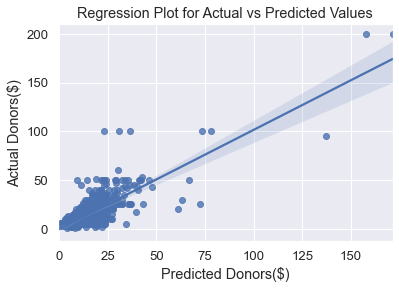

In [47]:
g = sns.regplot(x=lm.predict(X_test), y=y_test, fit_reg=True)
g.set(xlabel='Predicted Donors($)', ylabel='Actual Donors($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

From the graph above the model seems to be a good fit for the data, except for a few outliers.

Let us calcualte $R^2$ and RMSE (Root Mean Square Error) for the train and test sets to further assess the model.

$R^2$: It is the percentage of the response variable variation that is explained by a linear model

RMSE: It is the square root of the mean of squared errors. Squared errors are the difference of actual and predicted values sqaured.

In [48]:
# R2 for train and test data
R2_reg_train = lm.score(X_train,y_train)
R2_reg_test = lm.score(X_test,y_test)
print('R squared for train data is: %.3f' %(R2_reg_train))
print('R squared for test data is: %.3f' %(R2_reg_test))

R squared for train data is: 0.465
R squared for test data is: 0.647


The train set experiences more variance than the test set. This is quite common because the model is trained on training data, training set's $R^2$ is always greater than the test set's $R^2$.
Since the test score is more than train score, let us see if it is a case of Overfitting or Underfitting by plotting a Residual Plot

In [49]:
from math import sqrt
RMSE_reg_train = sqrt(np.mean((y_train - lm.predict(X_train))**2))
RMSE_reg_test = sqrt(np.mean((y_test - lm.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_reg_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_reg_test))

Root mean squared error for train data is: 9.068
Root mean sqaured error for test data is: 7.462


Text(0.5, 1.0, 'Residual Plot using train data')

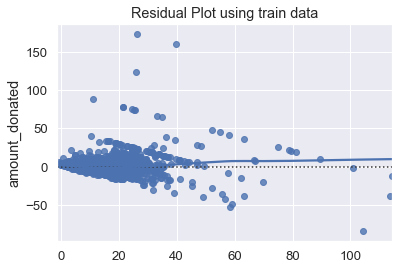

In [50]:
sns.residplot(x=lm.predict(X_train), y=y_train, lowess=True)
plt.title('Residual Plot using train data')


Text(0.5, 1.0, 'Residual Plot using test data')

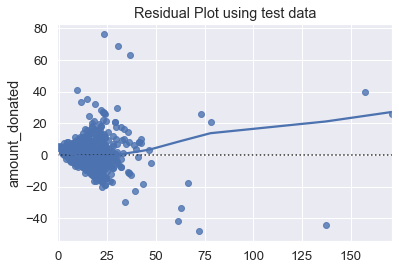

In [51]:
sns.residplot(x=lm.predict(X_test), y=y_test, lowess=True)
plt.title('Residual Plot using test data')

Text(0, 0.5, 'Residuals')

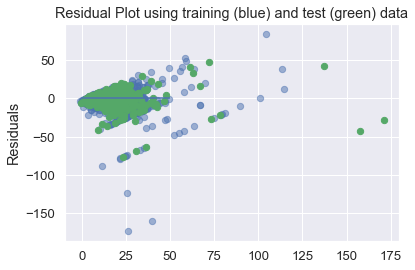

In [52]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

Analysis:

The regression line appears to be a good fit for the data.
The train and test scores not being too different form each other, indiactes that there is no Overfitting.
The distribution of test and train data looks similar in the residual plot, which says that there is no big difference in residuals.

#### Regularization
With as many as 48 features in the model it is natural for the model to get quite complex. The model sticks too much to the data and the model has probably learned the background noise which results in high variance while being fit, which leads to Overfitting. This results in poor prediction and generalization power when applied o data outside the training set. To overcome this problem regularization technique is used.

To find the best model, the common method in machine learning is to define a loss or cost function that describes how well the model fits the data. The goal is to find the model that minimzes this loss function. The idea is to penalize this loss function by adding a complexity term that would give a bigger loss for more complex models.

Regularization allows to shrink the coefficients to zero by introducing a tuning parameter 'lambda' or 'alpha'. This ensures:

Shrinking of parameters, therefore it is mostly used to prevent multicollinearity.
Reduces the model complexity by coefficient shrinkage.
The two popular methods used to regularize parameters are:

Ridge Regression
Lasso Regression
Ridge Regression: Ridge regression uses L2 penalty to penalize coefficients. L2 penalty is the penalty equivalent to square of the magnitude of coefficients

Lasso Regression: Lasso regression uses L1 penalty which is the absolute value of the magnitude of coefficients

Let us apply Ridge and Lasso models to our data



In [54]:
independent_variables =  ['months_since_origin', 'in_house', 'ses', 'income_group', 'published_phone', 'mor_hit_rate', 
'wealth_rating', 'median_home_value', 'pct_attribute1', 'pct_attribute3', 'pct_attribute4', 'pep_star', 'recent_star_status',
'frequency_status_97nk', 'recent_avg_card_gift_amt', 'recent_card_response_count', 'lifetime_gift_amount', 'lifetime_max_gift_amt', 
'lifetime_min_gift_amt', 'last_gift_amt', 'urbanicity_R', 'urbanicity_S', 'urbanicity_T', 'urbanicity_U', 'urbanicity_X', 
'home_owner_U', 'donor_gender_M', 'donor_gender_U', 'overlay_source_M', 'overlay_source_P', 'recency_status_96nk_E', 
'recency_status_96nk_F', 'recency_status_96nk_L', 'recency_status_96nk_N', 'recency_status_96nk_S']
# use the list to select a subset from original DataFrame


In [56]:
X = X[independent_variables]


KeyError: "['recency_status_96nk_N', 'urbanicity_R', 'urbanicity_X', 'urbanicity_U', 'pct_attribute1', 'recency_status_96nk_E', 'recency_status_96nk_S', 'recency_status_96nk_L', 'overlay_source_M', 'lifetime_max_gift_amt', 'mor_hit_rate'] not in index"

In [36]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=101)